# Gradient Descent plots

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


Cout = [1, 2, 3, 4, 8]

# Read arrays

def get_rbetas(pair):
    name =  "experiments-data/" + "rbetas" + str(pair) + "inputchannel" + ".csv"
    rbetas = pd.read_csv(name, header=None).values.astype(np.float)
    return rbetas

def get_rbetas_all(k):
    rbetas_all = []
    for c in Cout:
        pair = (k, c)
        rbetas = get_rbetas(pair)
        rbetas_all.append(rbetas)
    return rbetas_all



In [13]:

# Print rbeta values and load beta values
k = 1
def print_rbetas(k):
    rbetas_all = get_rbetas_all(k)
    for i in range(len(Cout)):
        print("Value to copy: " + str(np.round(rbetas_all[i], 2)))

print_rbetas(k)
betas_k = get_betas_all(k)


FileNotFoundError: [Errno 2] No such file or directory: 'experiments-data/rbetas(1, 1)inputchannel.csv'

In [ ]:
def plot(k, C):
    betas = []
    pair = (k, C)
    for j in range(3):
        name = "experiments-data/" + "beta" + str(pair) + "inputchannel" + str(j) + ".csv"
        beta = pd.read_csv(name, header=None).values.astype(np.float)
        betas.append(beta)


    beta_to_plot = []
    for c in range(3):
        beta_to_plot.append(np.copy(betas[c]))

    beta_to_plot_time = []
    beta_to_plot_freq = []

    for i in range(3):
        beta_to_plot_time.append(beta_to_plot[i])
        beta_to_plot_freq.append(np.abs(np.fft.fft2(beta_to_plot[i], norm='ortho')))


    # Compute beta for linear CNNs
    sns.set_context("paper",font_scale=3, rc={"lines.linewidth":1})
    fig, axs = plt.subplots(2, 3, figsize=(15,10))
    for c in range(3):
        axs[0][c].imshow(beta_to_plot_time[c],cmap='gray')
        axs[0][c].set_xticklabels([])
        axs[0][c].set_yticklabels([])

        axs[1][c].imshow(beta_to_plot_freq[c],cmap='gray', norm=LogNorm(vmin=0.0001, vmax=0.08))
        axs[1][c].set_xticklabels([])
        axs[1][c].set_yticklabels([])

    plt.tight_layout() # for some reason not using tight_layout before savefig messes some borders up
    name = "plots/" + "kernelsize" + str(k) + "outputchannels" + str(C) + ".pdf"
    plt.savefig(name, format='pdf')

    plt.show()

# Plot for given (k, C) pair
k = 1
C = 3
plot(k, C)


# CVXPY images 

In [4]:
import pandas

betas_ell2ell2 = []
for i in range(3):
    name =  "experiments-data/cvxpy-ell2ell2-inputchannel" + str(i)
    betas_ell2ell2.append(pd.read_csv(name, header=None).values.astype(np.float))
    
betas_ell2ell1 = []
for i in range(3):
    name =  "experiments-data/cvxpy-ell2ell1-inputchannel" + str(i)
    betas_ell2ell1.append(pd.read_csv(name, header=None).values.astype(np.float))
    
betas_ell1 = []
for i in range(3):
    name =  "experiments-data/cvxpy-ell1-inputchannel" + str(i)
    betas_ell1.append(pd.read_csv(name, header=None).values.astype(np.float))


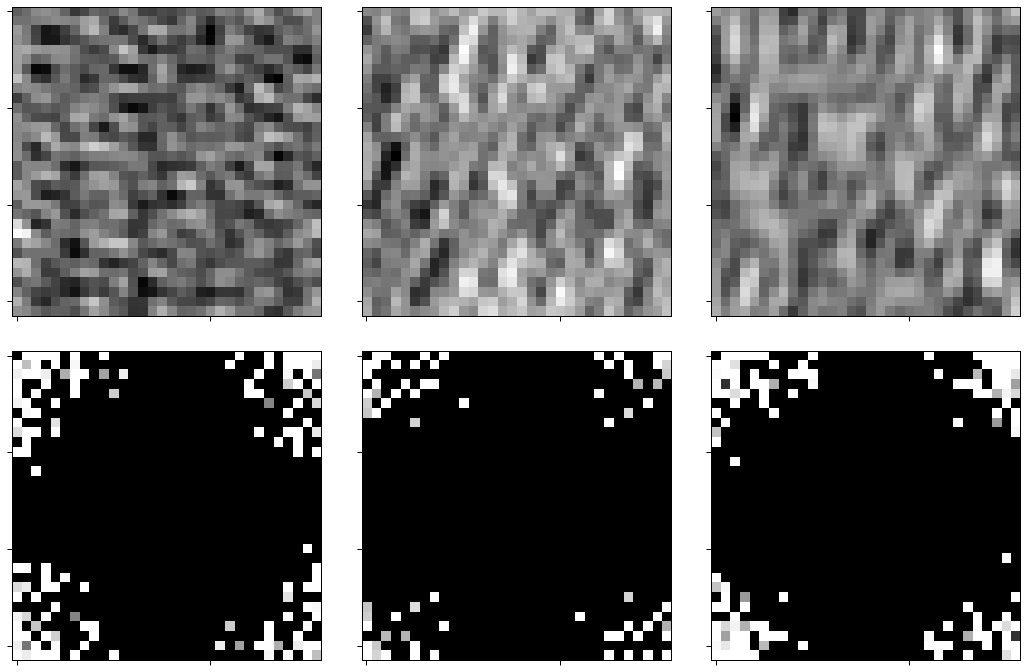

In [8]:
import seaborn as sns
from matplotlib.colors import LogNorm

beta_to_plot = np.copy(betas_ell1)

beta_to_plot_time = []
beta_to_plot_freq = []
for i in range(3):
    beta_to_plot_time.append(beta_to_plot[i])
    #         print(beta.shape)
    #         print(np.fft.fft2(beta, norm='ortho').shape)
    beta_to_plot_freq.append(np.abs(np.fft.fft2(beta_to_plot[i], norm='ortho')))

# Compute beta for linear CNNs
sns.set_context("paper",font_scale=3, rc={"lines.linewidth":1})
fig, axs = plt.subplots(2, 3, figsize=(15,10))
for k in range(3):
    axs[0][k].imshow(beta_to_plot_time[k],cmap='gray')
    axs[0][k].set_xticklabels([])
    axs[0][k].set_yticklabels([])

    axs[1][k].imshow(beta_to_plot_freq[k],cmap='gray', norm=LogNorm(vmin=0.0001, vmax=0.08))
    axs[1][k].set_xticklabels([])
    axs[1][k].set_yticklabels([])

plt.tight_layout() # for some reason not using tight_layout before savefig messes some borders up
name = "plots/" + "cvxpy-ell1" + ".pdf"
plt.savefig(name, format='pdf')

plt.show()